In [3]:
import os

os.chdir("../..")

In [4]:
import utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
import seaborn as sns
import pickle
from sklearn.metrics import roc_auc_score

In [6]:
results = pd.read_csv("output/results_ptbxl.csv", index_col="Method")
results = results['exp4_AUC'].to_frame()
results = results[results['exp4_AUC']!='---']
results['AUC'] = results['exp4_AUC'].str.extract(r'(\d+\.\d+)', expand=False).astype(float)
results['CI'] = results['exp4_AUC'].str.extract(r'\((\d+)\)', expand=False).astype(float)
results['CI'] = results['CI']/1000

results.sort_index(inplace=True)
results.index = results.index.str.replace(r'models\\', '')
results = results.sort_values("AUC")

C:\Users\agarw\AppData\Local\Temp\ipykernel_11892\2379245209.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  results.index = results.index.str.replace(r'models\\', '')


In [7]:
results

,exp4_AUC,AUC,CI
Method,,,
naive,0.500(00),0.500,0.000
Simple+Baseline+lead1,0.681(28),0.681,0.028
Wavelet+NN+lead1,0.735(24),0.735,0.024
Wavelet+RF+lead1,0.735(24),0.735,0.024
InceptionSE+lead1,0.758(14),0.758,0.014
NewWavelet+NN+lead1,0.766(25),0.766,0.025
LeNetAttn+lead1,0.807(14),0.807,0.014
Wavelet+NN,0.818(20),0.818,0.020
Simple+Baseline,0.819(17),0.819,0.017


In [8]:
methods = results.index.to_list()
methods.remove("naive")

In [9]:
raw_test_preds = []
raw_val_preds = []

for method in methods:
    test = np.load(f"output/exp4/models/{method}/y_test_pred.npy", allow_pickle=True)
    val = np.load(f"output/exp4/models/{method}/y_val_pred.npy", allow_pickle=True)
    raw_test_preds += [test]
    raw_val_preds += [val]

In [10]:
with open(r"C:\Mohit\Imperial\fyp-hearts\output\exp4\data\mlb.pkl", 'rb') as f:
    mlb = pickle.load(f).classes_
y_test =np.load(r"C:\Mohit\Imperial\fyp-hearts\output\exp4\data\y_test.npy", allow_pickle=True)
y_val =np.load(r"C:\Mohit\Imperial\fyp-hearts\output\exp4\data\y_val.npy", allow_pickle=True)

In [11]:
attnet_test = raw_test_preds[-1]

In [12]:
list(mlb).index("CLBBB")

8

In [13]:
np.unique((attnet_test[:,8]>0.5).astype(int), return_counts=True)

(array([0, 1]), array([2100,   48], dtype=int64))

In [14]:
clbbb_diag = attnet_test[(attnet_test[:,8]>0.5)]

In [15]:
clbbb_diag = pd.DataFrame((clbbb_diag>0.5).astype(int), columns=mlb)

clbbb_diag.sum(axis=0)

2AVB      0
3AVB      0
ABQRS     0
AFIB      8
AFLT      0
ALMI      0
AMI       0
ASMI      0
CLBBB    48
CRBBB     0
EL        0
ILMI      0
IMI       0
INJAL     0
INJAS     0
INJIL     0
INJIN     0
INJLA     0
IPLMI     0
IPMI      0
ISCAL     0
ISCAN     0
ISCAS     0
ISCIL     0
ISCIN     0
ISCLA     0
ISC_      0
LMI       0
LNGQT     0
NDT       0
NORM      0
NST_      0
PAC       0
PMI       0
PSVT      0
PVC       3
SBRAD     0
SR       35
STD_      0
STE_      0
SVTAC     0
TAB_      0
WPW       0
dtype: int64

In [16]:
multiple_clbbb.sum(axis=0)

NameError: name 'multiple_clbbb' is not defined

In [17]:
y_test = pd.DataFrame(y_test, columns=mlb)
attnet_test = pd.DataFrame((raw_test_preds[-1]>0.5).astype(int), columns=mlb)

In [18]:
y_test_clbbb = y_test[attnet_test['CLBBB']==1]
attnet_test_clbbb = attnet_test[attnet_test['CLBBB']==1]

In [19]:
y_test_clbbb.sum(axis=0)

2AVB      0
3AVB      0
ABQRS     1
AFIB      8
AFLT      0
ALMI      0
AMI       0
ASMI      4
CLBBB    43
CRBBB     1
EL        0
ILMI      3
IMI       1
INJAL     0
INJAS     0
INJIL     0
INJIN     0
INJLA     0
IPLMI     1
IPMI      0
ISCAL     0
ISCAN     0
ISCAS     0
ISCIL     0
ISCIN     0
ISCLA     0
ISC_      2
LMI       0
LNGQT     0
NDT       0
NORM      0
NST_      1
PAC       1
PMI       0
PSVT      0
PVC       6
SBRAD     2
SR       29
STD_      0
STE_      0
SVTAC     0
TAB_      0
WPW       0
dtype: int64

In [20]:
(raw_test_preds[-1][:,8]>0.5).astype(int).shape

y_test['CLBBB']

0       0
1       0
2       0
3       0
4       0
       ..
2143    0
2144    0
2145    0
2146    0
2147    0
Name: CLBBB, Length: 2148, dtype: int32

In [21]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score, recall_score, precision_score

print(f"f1 score: {f1_score(y_test['CLBBB'],(raw_test_preds[-1][:,8]>0.5).astype(int))}")
print(f"AUC: {roc_auc_score(y_test['CLBBB'],(raw_test_preds[-1][:,8]>0.5).astype(int))}")
print(f"Accuracy: {accuracy_score(y_test['CLBBB'],(raw_test_preds[-1][:,8]>0.5).astype(int))}")
print(f"Specificity: {recall_score(y_test['CLBBB'],(raw_test_preds[-1][:,8]>0.5).astype(int), pos_label=0)}")
print(f"Sensitivity: {recall_score(y_test['CLBBB'],(raw_test_preds[-1][:,8]>0.5).astype(int), pos_label=1)}")
print(f"Precision: {precision_score(y_test['CLBBB'],(raw_test_preds[-1][:,8]>0.5).astype(int))}")


f1 score: 0.8431372549019608
AUC: 0.896954260851109
Accuracy: 0.9925512104283054
Specificity: 0.9976122254059216
Sensitivity: 0.7962962962962963
Precision: 0.8958333333333334


In [23]:
from sklearn.metrics import recall_score, precision_score

In [24]:
test_aucs = pd.DataFrame(columns=methods, index=mlb)


true = y_test['CLBBB']
for method in range(len(methods)):
    pred = raw_test_preds[method][:,8]
    test_aucs[methods[method]][mlb[8]] = roc_auc_score(true, pred)

test_aucs = test_aucs.dropna().T
test_aucs['F1 Score'] = 0
test_aucs['Accuracy'] = 0
test_aucs['Sensitivity'] = 0
test_aucs['Specificity'] = 0
test_aucs['Precision'] = 0



for method in range(len(methods)):
    pred = raw_test_preds[method][:,8]
    test_aucs["F1 Score"][methods[method]] = f1_score(true, (pred>0.5).astype(int))
    test_aucs["Accuracy"][methods[method]] = accuracy_score(true, (pred>0.5).astype(int))
    test_aucs["Sensitivity"][methods[method]] = recall_score(true, (pred>0.5).astype(int), pos_label=1)
    test_aucs["Specificity"][methods[method]] = recall_score(true, (pred>0.5).astype(int), pos_label=0)
    test_aucs["Precision"][methods[method]] = precision_score(true, (pred>0.5).astype(int))
    

test_aucs

C:\Users\agarw\AppData\Local\Temp\ipykernel_11892\2575258946.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_aucs["F1 Score"][methods[method]] = f1_score(true, (pred>0.5).astype(int))
C:\Users\agarw\AppData\Local\Temp\ipykernel_11892\2575258946.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_aucs["Accuracy"][methods[method]] = accuracy_score(true, (pred>0.5).astype(int))
C:\Users\agarw\AppData\Local\Temp\ipykernel_11892\2575258946.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,CLBBB,F1 Score,Accuracy,Sensitivity,Specificity,Precision
Simple+Baseline+lead1,0.838074,0.208955,0.975326,0.129630,0.997135,0.538462
Wavelet+NN+lead1,0.987884,0.775510,0.989758,0.703704,0.997135,0.863636
Wavelet+RF+lead1,0.991037,0.774194,0.990223,0.666667,0.998567,0.923077
InceptionSE+lead1,0.873015,0.000000,0.974860,0.000000,1.000000,0.000000
NewWavelet+NN+lead1,0.989343,0.803922,0.990689,0.759259,0.996657,0.854167
LeNetAttn+lead1,0.987336,0.760870,0.989758,0.648148,0.998567,0.921053
Wavelet+NN,0.997144,0.860000,0.993482,0.796296,0.998567,0.934783
Simple+Baseline,0.990113,0.707071,0.986499,0.648148,0.995224,0.777778
VGGNet+lead1,0.993341,0.741573,0.989292,0.611111,0.999045,0.942857
LeNet+lead1,0.996524,0.795918,0.990689,0.722222,0.997612,0.886364


In [27]:
preds = []
for method in range(len(methods)):
    preds += [raw_test_preds[method][:,8]]

smv = np.array(preds).mean(axis=0)

test_aucs.loc['SMV']= 0

test_aucs["CLBBB"]["SMV"] = roc_auc_score(true, smv)
test_aucs["F1 Score"]["SMV"] = f1_score(true, (smv>0.5).astype(int))
test_aucs["Accuracy"]["SMV"] = accuracy_score(true, (smv>0.5).astype(int))
test_aucs["Sensitivity"]["SMV"] = recall_score(true, (smv>0.5).astype(int), pos_label=1)
test_aucs["Specificity"]["SMV"] = recall_score(true, (smv>0.5).astype(int), pos_label=0)
test_aucs["Precision"]["SMV"] = precision_score(true, (smv>0.5).astype(int))

test_aucs

C:\Users\agarw\AppData\Local\Temp\ipykernel_34692\652944992.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_aucs["CLBBB"]["SMV"] = roc_auc_score(true, smv)
C:\Users\agarw\AppData\Local\Temp\ipykernel_34692\652944992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_aucs["F1 Score"]["SMV"] = f1_score(true, (smv>0.5).astype(int))
C:\Users\agarw\AppData\Local\Temp\ipykernel_34692\652944992.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,CLBBB,F1 Score,Accuracy,Sensitivity,Specificity,Precision
Simple+Baseline+lead1,0.838074,0.208955,0.975326,0.129630,0.997135,0.538462
Wavelet+NN+lead1,0.987884,0.775510,0.989758,0.703704,0.997135,0.863636
Wavelet+RF+lead1,0.991037,0.774194,0.990223,0.666667,0.998567,0.923077
InceptionSE+lead1,0.873015,0.000000,0.974860,0.000000,1.000000,0.000000
NewWavelet+NN+lead1,0.989343,0.803922,0.990689,0.759259,0.996657,0.854167
VGGNet+lead1,0.993341,0.741573,0.989292,0.611111,0.999045,0.942857
LeNetAttn+lead1,0.987336,0.760870,0.989758,0.648148,0.998567,0.921053
Wavelet+NN,0.997144,0.860000,0.993482,0.796296,0.998567,0.934783
LeNet+lead1,0.996524,0.795918,0.990689,0.722222,0.997612,0.886364
Simple+Baseline,0.990113,0.707071,0.986499,0.648148,0.995224,0.777778


In [28]:
(test_aucs['CLBBB']['SMV']-0.942)/0.942

0.059843711074504986

In [26]:
chosen_ones = ['Wavelet+NN+lead1', 'NewWavelet+NN+lead1', 'VGGNet+lead1',
               'LeNet+lead1', 'AlexNet+lead1', 'ResNet+Baseline+lead1', 
               'AttNet+Baseline+lead1']

new_names = ['Wavelet', 'HCF', 'VGGNet', 'LeNet', 'AlexNet', 'ResNet', 'AttNet']

res = test_aucs.loc[chosen_ones]
res.index = new_names

res.sort_values(by=['CLBBB'], inplace=True, ascending=False)

In [27]:
preds = []
for method in range(len(new_names)):
    preds += [raw_test_preds[method][:,8]]

smv = np.array(preds).mean(axis=0)

res.loc['SMV']= 0

res["CLBBB"]["SMV"] = roc_auc_score(true, smv)
res["F1 Score"]["SMV"] = f1_score(true, (smv>0.5).astype(int))
res["Accuracy"]["SMV"] = accuracy_score(true, (smv>0.5).astype(int))
res["Sensitivity"]["SMV"] = recall_score(true, (smv>0.5).astype(int), pos_label=1)
res["Specificity"]["SMV"] = recall_score(true, (smv>0.5).astype(int), pos_label=0)
res["Precision"]["SMV"] = precision_score(true, (smv>0.5).astype(int))

res

C:\Users\agarw\AppData\Local\Temp\ipykernel_11892\3370043224.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["CLBBB"]["SMV"] = roc_auc_score(true, smv)
C:\Users\agarw\AppData\Local\Temp\ipykernel_11892\3370043224.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["F1 Score"]["SMV"] = f1_score(true, (smv>0.5).astype(int))
C:\Users\agarw\AppData\Local\Temp\ipykernel_11892\3370043224.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,CLBBB,F1 Score,Accuracy,Sensitivity,Specificity,Precision
AlexNet,0.998037,0.843137,0.992551,0.796296,0.997612,0.895833
LeNet,0.996524,0.795918,0.990689,0.722222,0.997612,0.886364
AttNet,0.995525,0.843137,0.992551,0.796296,0.997612,0.895833
ResNet,0.994773,0.760870,0.989758,0.648148,0.998567,0.921053
VGGNet,0.993341,0.741573,0.989292,0.611111,0.999045,0.942857
HCF,0.989343,0.803922,0.990689,0.759259,0.996657,0.854167
Wavelet,0.987884,0.775510,0.989758,0.703704,0.997135,0.863636
SMV,0.996047,0.704545,0.987896,0.574074,0.998567,0.911765


In [28]:
import seaborn as sns

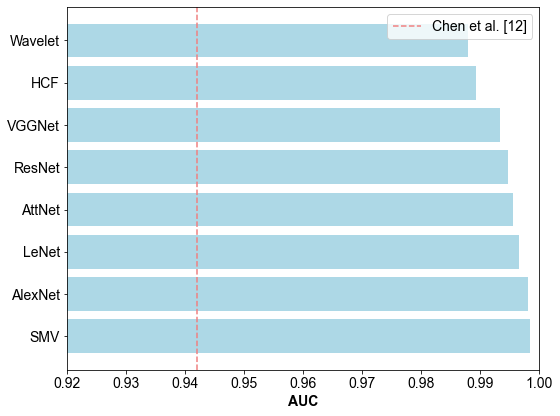

In [59]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14  # Increase font size

clbbb_values = res['CLBBB']
benchmark_value = 0.942 # Replace with your desired benchmark value

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the horizontal bar chart
ax.barh(range(len(clbbb_values)), clbbb_values, color='#ADD8E6')

# Set the x-axis and y-axis labels
ax.set_xlabel('AUC', fontsize=14, fontweight='bold')
ax.set_yticks(range(len(clbbb_values)))
ax.set_yticklabels(res.index)
ax.set_xlim(0.92,1)

# Add a vertical line for the benchmark value
ax.axvline(benchmark_value, color='#F08080', linestyle='--', label='Chen et al. [12]')

# Add a legend
ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()
plt.savefig(r"C:\Users\agarw\OneDrive - Imperial College London\Year 4\Final Year Project\Report Images\clbb_auc.png", dpi=1000, bbox_inches='tight')

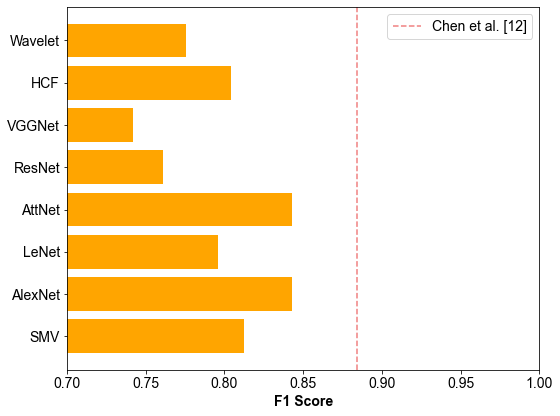

In [58]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14  # Increase font size

res.sort_values(by=['F1 Score'], ascending=False)
clbbb_values = res['F1 Score']
benchmark_value = 0.884 # Replace with your desired benchmark value

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the horizontal bar chart
ax.barh(range(len(clbbb_values)), clbbb_values, color='#FFA500')

# Set the x-axis and y-axis labels
ax.set_xlabel('F1 Score', fontsize=14, fontweight='bold')
ax.set_yticks(range(len(clbbb_values)))
ax.set_yticklabels(res.index)
ax.set_xlim(0.7,1)

# Add a vertical line for the benchmark value
ax.axvline(benchmark_value, color='#F08080', linestyle='--', label='Chen et al. [12]')

# Add a legend
ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()
plt.savefig(r"C:\Users\agarw\OneDrive - Imperial College London\Year 4\Final Year Project\Report Images\clbb_f1.png", dpi=1000, bbox_inches='tight')

Text(29.0, 0.5, 'True labels')

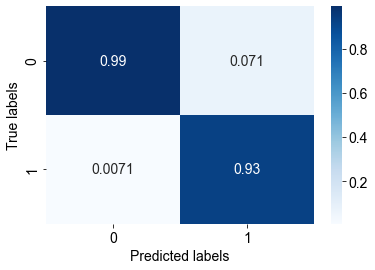

In [70]:
from sklearn.metrics import *

cm = confusion_matrix(true, (smv>0.5).astype(int), normalize='pred')
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

In [71]:
res

,CLBBB,F1 Score,Accuracy,Sensitivity,Specificity,Precision
SMV,0.998373,0.812500,0.991620,0.722222,0.998567,0.928571
AlexNet,0.998037,0.843137,0.992551,0.796296,0.997612,0.895833
LeNet,0.996524,0.795918,0.990689,0.722222,0.997612,0.886364
AttNet,0.995525,0.843137,0.992551,0.796296,0.997612,0.895833
ResNet,0.994773,0.760870,0.989758,0.648148,0.998567,0.921053
VGGNet,0.993341,0.741573,0.989292,0.611111,0.999045,0.942857
HCF,0.989343,0.803922,0.990689,0.759259,0.996657,0.854167
Wavelet,0.987884,0.775510,0.989758,0.703704,0.997135,0.863636


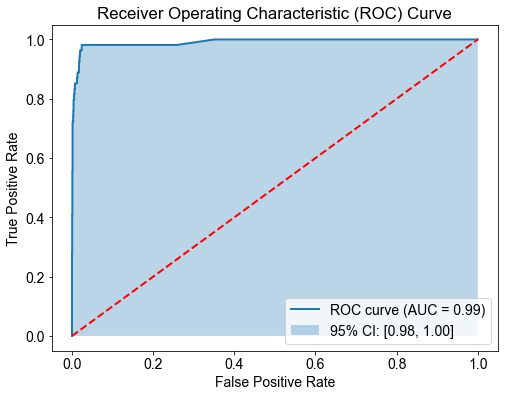

In [74]:
from sklearn.utils import resample

pred = raw_test_preds[2][:,8]
fpr, tpr, thresholds = roc_curve(true, pred)
roc_auc = roc_auc_score(true, pred)

# Bootstrap to get confidence intervals
n_bootstraps = 1000
roc_aucs = []

for _ in range(n_bootstraps):
    y_true_boot, y_score_boot = resample(true, pred)
    roc_aucs.append(roc_auc_score(y_true_boot, y_score_boot))

roc_aucs = np.array(roc_aucs)
roc_aucs.sort()

# Plot the ROC curve with confidence intervals
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plot the confidence intervals
# plt.fill_between(fpr, 
#                  tpr, 
#                  np.concatenate([[0], tpr]), 
#                  alpha=0.3, 
#                  label=f'95% CI: [{roc_aucs[25]:.2f}, {roc_aucs[975]:.2f}]')
plt.fill_between(fpr, tpr, alpha=0.3, label=f'95% CI: [{roc_aucs[25]:.2f}, {roc_aucs[975]:.2f}]')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

In [89]:
smv[true==1][smv[true==1]<0.5].mean()

0.2918362912303564

In [90]:
smv[true==0].mean()

0.007529017848712098

In [97]:
f1_score(true, (smv>0.2).astype(int))

0.8490566037735849

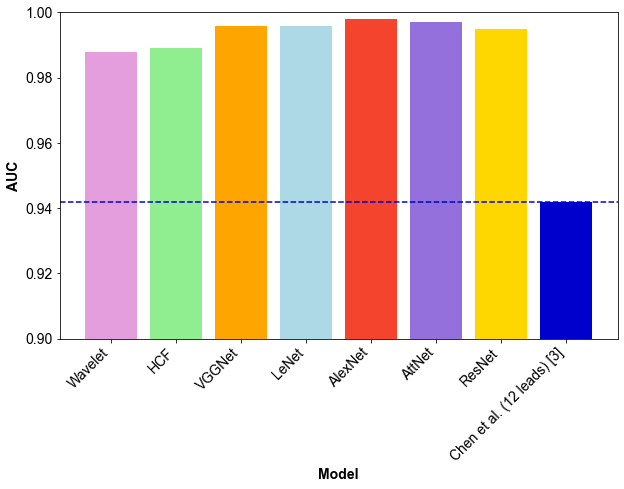

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14  # Increase font size

# Data from the user-provided table
data = {
    'Model': ['Wavelet', 'HCF', 'VGGNet', 'LeNet', 'AlexNet', 'AttNet', 'ResNet', 'Chen et al. (12 leads) [3]'],
    'AUC': [0.988, 0.989, 0.996, 0.996 ,0.998, 0.997, 0.995, 0.942]
}

# Colors specified by the user
colors = ['#E59EDD', '#90EE90', '#FFA500', '#ADD8E6', '#F4442E', '#9370DB', '#FFD700', '#0000cd']

# Creating DataFrame
df = pd.DataFrame(data)

# Plotting the bar chart with the specified updates
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Model'], df['AUC'], color=colors)

# Adding labels and title
plt.xlabel('Model', fontweight="bold")
plt.ylabel('AUC', fontweight="bold")
plt.ylim(0.9, 1.00)

# Adding the horizontal line at the Chen et al. AUC value with the same color and thicker line
plt.axhline(y=0.942, color='#0000cd', linestyle='--')

# Adjusting tick labels to ensure they do not coincide
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.savefig(r"C:\Users\agarw\OneDrive - Imperial College London\Year 4\Final Year Project\Report Images\clbb_auc.png", dpi=1000, bbox_inches='tight')
plt.show()


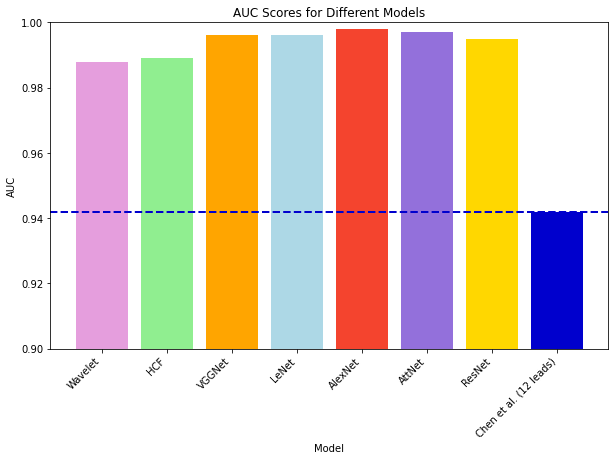

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

error_bars = [0.0019, 0.0025, 0.0024, 0.0012, 0.0005, 0.0003, 0.0010, 0]
# Data from the user-provided table
data = {
    'Model': ['Wavelet', 'HCF', 'VGGNet', 'LeNet', 'AlexNet', 'AttNet', 'ResNet', 'Chen et al. (12 leads)'],
    'AUC': [0.988, 0.989, 0.996, 0.996 ,0.998, 0.997, 0.995, 0.942]
}

# Colors specified by the user
colors = ['#E59EDD', '#90EE90', '#FFA500', '#ADD8E6', '#F4442E', '#9370DB', '#FFD700', '#0000cd']

# Creating DataFrame
df = pd.DataFrame(data)

# Plotting the bar chart with the specified updates
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Model'], df['AUC'], color=colors, clip_on=True)

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('AUC')
plt.title('AUC Scores for Different Models')
plt.ylim(0.9, 1.00)

# Adding the horizontal line at the Chen et al. AUC value with the same color and thicker line
plt.axhline(y=0.942, color='#0000cd', linestyle='--', linewidth=2)

# Adjusting tick labels to ensure they do not coincide
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.show()

In [31]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

def bootstrap_auc_ci(y_true, y_pred, num_bootstrap=1000, alpha=0.95):
    """
    Calculate the 95% confidence interval for the AUC using bootstrapping.

    Parameters:
    y_true (array-like): True binary labels.
    y_pred (array-like): Predicted probabilities.
    num_bootstrap (int): Number of bootstrap samples to generate.
    alpha (float): Confidence level, default is 0.95 for 95% confidence interval.

    Returns:
    tuple: Lower and upper bounds of the 95% confidence interval for the AUC.
    """
    # Calculate the original AUC
    auc_original = roc_auc_score(y_true, y_pred)
    
    # Generate bootstrap samples and calculate AUCs
    bootstrapped_aucs = []
    n = len(y_true)
    
    for _ in range(num_bootstrap):
        indices = np.random.randint(0, n, n)
        if len(np.unique(y_true[indices])) < 2:
            # Skip this iteration if only one class is present in the sample
            continue
        auc = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_aucs.append(auc)
    
    # Calculate the confidence interval
    sorted_aucs = np.sort(bootstrapped_aucs)
    lower_bound = np.percentile(sorted_aucs, ((1 - alpha) / 2) * 100)
    upper_bound = np.percentile(sorted_aucs, (1 - (1 - alpha) / 2) * 100)
    
    return lower_bound, upper_bound

# Example usage
y_true = np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0])
y_pred = np.array([0.1, 0.4, 0.35, 0.8, 0.45, 0.3, 0.7, 0.2, 0.65, 0.5])
lower, upper = bootstrap_auc_ci(y_true, y_pred)
return lower, upper


95% CI for AUC: (0.240, 1.000)


In [56]:
for i in [1,4,5,8,9,12,13,14]:
    a,b = bootstrap_auc_ci(y_test['CLBBB'], raw_test_preds[i][:,8])
    print((b - a))

0.02031607131584956
0.023746393410925437
0.02394280315429953
0.012157343108940899
0.004561936100397568
0.0029022192133825175
0.010313576035490213
0.008819958830052599


In [47]:
y_test['CLBBB']

0       0
1       0
2       0
3       0
4       0
       ..
2143    0
2144    0
2145    0
2146    0
2147    0
Name: CLBBB, Length: 2148, dtype: int32